In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve
from yellowbrick.model_selection import cv_scores, FeatureImportances
import pickle

In [2]:
!pip install -U yellowbrick --quiet

In [3]:
os.chdir(r"C:\Users\Dan Masibo\Desktop\diabetes_1")

In [4]:
os.getcwd()

'C:\\Users\\Dan Masibo\\Desktop\\diabetes_1'

In [5]:
df=pd.read_csv("Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

0    65.1
1    34.9
Name: Outcome, dtype: float64

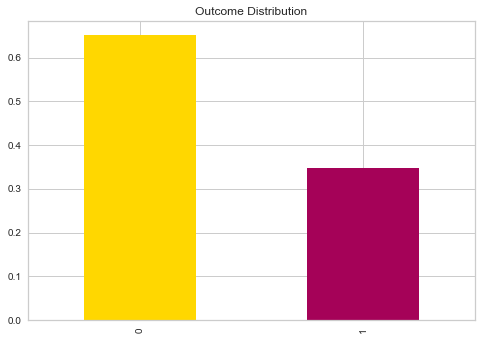

In [7]:
# Display the Outcome distribution

df.Outcome.value_counts(normalize=True).plot.bar(title="Outcome Distribution", color=["gold", 'm'])
df.Outcome.value_counts(normalize=True).round(3)*100

In [8]:
# splitting the dataset into train and test datasets

X_train, X_test, y_train, y_test=train_test_split(df.drop('Outcome', 1), 
                                                  df['Outcome'], 
                                                  test_size=0.2, random_state=0)

In [9]:
X_train.shape, X_test.shape, df.shape

((614, 8), (154, 8), (768, 9))

In [10]:
# Random Forest Classifier model

rf=RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [11]:
prediction=rf.predict(X_test)

In [12]:
print("acc_score:", round(accuracy_score(y_test, prediction)*100, 2), '%')
print("rec_score:", round(recall_score(y_test, prediction)*100, 2), '%')
print("prec_score:", round(precision_score(y_test, prediction)*100, 2), '%')
print("f1_score:", round(f1_score(y_test, prediction)*100, 2), '%')

acc_score: 78.57 %
rec_score: 61.7 %
prec_score: 65.91 %
f1_score: 63.74 %


In [13]:
# Gradient Boosting

gb=GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [14]:
predict=gb.predict(X_test)

In [15]:
print("acc_score:", round(accuracy_score(y_test, predict)*100, 2), '%')
print("rec_score:", round(recall_score(y_test, predict)*100, 2), '%')
print("prec_score:", round(precision_score(y_test, predict)*100, 2), '%')
print("f1_score:", round(f1_score(y_test, predict)*100, 2), '%')

acc_score: 81.17 %
rec_score: 68.09 %
prec_score: 69.57 %
f1_score: 68.82 %


In [16]:
adb=AdaBoostClassifier()
adb.fit(X_train, y_train)

AdaBoostClassifier()

In [17]:
pred=adb.predict(X_test)

In [18]:
print("acc_score:", round(accuracy_score(y_test, pred)*100, 2), '%')
print("rec_score:", round(recall_score(y_test, pred)*100, 2), '%')
print("prec_score:", round(precision_score(y_test, pred)*100, 2), '%')
print("f1_score:", round(f1_score(y_test, pred)*100, 2), '%')

acc_score: 77.92 %
rec_score: 65.96 %
prec_score: 63.27 %
f1_score: 64.58 %


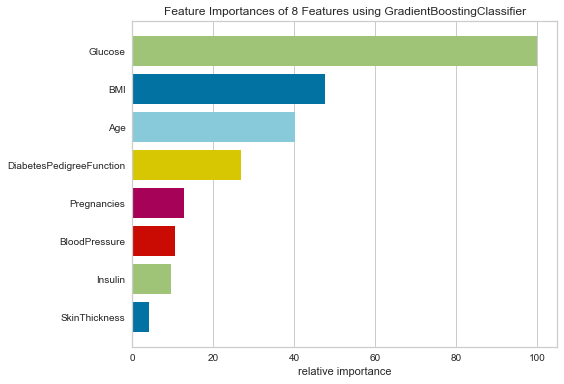

<AxesSubplot:title={'center':'Feature Importances of 8 Features using GradientBoostingClassifier'}, xlabel='relative importance'>

In [19]:
# Feature importances

gb=GradientBoostingClassifier()
imp=FeatureImportances(gb)
imp.fit(X_train, y_train)
imp.show()

In [20]:
# pickle the best model

model=GradientBoostingClassifier().fit(df.drop('Outcome', 1), df['Outcome'])
model.score(df.drop('Outcome', 1), df['Outcome'])

0.90625

In [21]:
# save the model

model_filename="GradientBoost_1.pkl"
pickle.dump(model, open('model_filename', 'wb'))

In [22]:
# load model

model=pickle.load(open("GradientBoost_1.pkl", 'rb'))
print(model.predict([[6,148,72,35,0,33.6,0.627,50]]))

[1]


In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
